<a href="https://colab.research.google.com/github/soleildayana/Positional-Astronomy/blob/main/Parcial1_AstroPosici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entrega 60% parcial I Astronomía de Posición** (marzo 2024)
Estudiante: Soleil Dayana Niño Murcia 1033097666


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") #al usar el .append en el DataFrame aparece un warning que ocupa mucho espacio acerca de que eliminarán esta opción para pandas, esto lo ignora

In [ ]:
def convert_coord(grades, minutes, seconds): #definiendo una función que convierte las coordenadas geodésicas en decimales
  coordenate= float(grades+minutes/60+seconds/3600)
  return (coordenate)

In [ ]:
print(convert_coord(81,37,27), convert_coord(90,4,40), convert_coord(144,25,56), convert_coord(21,45,27), convert_coord(39,25,22), convert_coord(-147,-43,-11))
#se usó la función para convertir todas las coordenadas que hallará en la tabla final

81.62416666666665 90.07777777777777 144.4322222222222 21.7575 39.422777777777775 -147.71972222222223


In [ ]:
def distancia (Lat_A, Long_A, Lat_B, Long_B, dist_geocentrica):
  if Lat_A<0: #Segmento de arco A-PNT
    a_1 = np.radians((np.pi/2)+ Lat_A)
  else:
    a_1 = np.radians((np.pi/2)- Lat_A)
  if Lat_B<0: #segmento de arco B-PNT
    b_1 = np.radians((np.pi/2)+ Lat_B)
  else:
    b_1 = np.radians((np.pi/2)- Lat_B)
  N = abs(Long_A-Long_B) #Ángulo polar entre A y B
  if N>np.pi:
    N = 2*np.pi - abs(Long_A-Long_B)
  AB = np.arccos(np.cos(a_1)*np.cos(b_1)+np.sin(a_1)*np.sin(b_1)*np.cos(N)) #hallando distancia A-B
  distance = np.degrees(dist_geocentrica*AB) #Distancia Recorrida por el avión
  print()
  print('Distancia Recorrida:', distance, 'km')
  return a_1, b_1, N, AB, distance

In [ ]:
def velocidad (vel, id_deseado): #En esta celda se asigna un ID a cada avión para tomar en cuenta su velocidad respectiva
  df['Velocidad (km/h)'] = df['Velocidad (km/h)'].astype(int)
  velocidad_correspondiente = int(df[df['ID'] == id_deseado]['Velocidad (km/h)']) #El usuario selecciona el avión
  print('V=', velocidad_correspondiente, 'km/h')
  return velocidad_correspondiente

In [ ]:
def func_t (distance, velocidad_correspondiente): #Hallando la duración del vuelo teniendo en cuenta que v=d/t
  time = distance/velocidad_correspondiente
  print('La duración del vuelo será de', time, 'horas')
  return time

In [ ]:
def find_angs (a_1, b_1, AB, N):   #Ángulos del triángulo esférico formado entre las dos coordenadas y el PNT
  A = np.arccos((np.cos(b_1)-(np.cos(a_1)*np.cos(AB)))/(np.sin(a_1)*np.sin(AB)))
  B = np.arccos((np.cos(a_1)-(np.cos(b_1)*np.cos(AB)))/(np.sin(b_1)*np.sin(AB)))
  C = N #Ángulo polar formado en el norte
  return A,B,C

In [ ]:
def find_ecuator (Lat_A, Long_A, Lat_B, Long_B, a_1, b_1, A): #Hallando la longitud de cruce con el ecuador
  if Lat_A*Lat_B<0: #Si la multiplicación de latitudes es menor que cero es porque las coordenadas se encuentran en distintos hemisferios, por tanto, cruza el ecuador
    print('La trayectoria cruza el ecuador')
    ca= np.arctan(-(np.cos(a_1)/(np.sin(a_1)*np.cos(A)))) #ca es el segmento de arco formado entre la coordenada A y el punto de cruce
    if ca<0:
      ca = ca+ np.pi #por lo que se aplica arcotangente
    CA= np.arccos(np.cos(ca)/np.sin(a_1)) #Aquí se halla el ángulo polar entre A y el punto de cruce, como se forma un triángulo isóceles, CA es equivalente al segmento de arco que va del punto de cruce a el corte del meridiano de A con el ecuador
    point_lambda_ec = np.degrees(Long_A+CA)
    print('Longitud de cruce:', point_lambda_ec, '°')
  else:
    ca = None
    CA = None
    point_lambda_ec = 'No cruza'
    print('La trayectoria no cruza por el ecuador, pues ambas coordenadas se encuentran en el mismo hemisferio.')
  return ca, CA, point_lambda_ec

In [ ]:
def find_GW (Lat_A, Long_A, Lat_B, Long_B, B, b_1):   #Latitud de cruce (relativa al Meridiano de Greenwich)
  if ((Long_A*Long_B)<0): #Si lamultiplicación de longitues es negativa, una coordenada se encuentra en W y otra en E, cruzando ya sea el meridiano o el antimeridiano
    if abs(Long_A-Long_B)>np.pi:
      print('Cruza el antimeridiano')
    Cb = abs(Long_B) #Ángulo polar formado entre el cruce por el meridiano y la coordenada B
    Q = np.arccos((np.sin(B)*np.sin(Long_B)*np.cos(b_1))-(np.cos(B)*np.cos(Long_B))) #Ángulo formado en el punto de cruce en el vértice entre a B y PNT
    q1 = np.arccos((np.cos(B)+np.cos(Q)*np.cos(Long_B))/(np.sin(Q)*np.sin(Long_B))) #segmento que va de PNT al punto de cruce
    phi_point = np.degrees((np.pi/2)-q1)
  else:
    Cb = None
    Q = None
    q1 = None
    phi_point = 'No cruza'
    print('No cruza por el Meridiano')
  print('Latitud de cruce=', phi_point, '°')
  print('\n')
  return Cb, Q, q1, phi_point

In [ ]:
def main (Lat_A, Long_A, Lat_B, Long_B, id_deseado, index): #Esta es la función principal, con ella se llaman todas las funciones necesarias para hallar lo que buscamos
  dist_geocentrica = 6378.137+11 #semieje mayor de la Tierra en km más el promedio de la altitud de vuelo
  print('CASO', index)
  a_1, b_1, N, AB, distance = distancia(Lat_A, Long_A, Lat_B, Long_B, dist_geocentrica)
  velocidad_correspondiente = velocidad(vel, id_deseado)
  print()
  time = func_t(distance, velocidad_correspondiente)
  A, B, C = find_angs(a_1, b_1, AB, N)
  ca, CA, point_lambda_ec = find_ecuator(Lat_A, Long_A, Lat_B, Long_B, a_1, b_1, A)
  Cb, Q, q1, phi_point = find_GW(Lat_A, Long_A, Lat_B, Long_B, B, b_1)
  return distance, time, point_lambda_ec, phi_point

In [ ]:
vel = { #DataFrame con las velocidades crucero correspondientes a cada avión de la flota en km/h
    'Avión': ['Airbus_A320', 'AirbusA330', 'Boeing737', 'Boeing777', 'Boeing727'],
    'Velocidad (km/h)': [871, 913, 952, 950, 907]
}
df = pd.DataFrame(vel)
df['ID'] = range(1, len(df) + 1)
df = df[['ID', 'Avión', 'Velocidad (km/h)']]
print('\n',df)
print('\n')
id_deseado = int(input('Ingresa el ID del avión que quieres tomar para viajar:',))
print('\n')
#Se definen dos diccionarios, primero uno vacío con todos los valores que deseamos hallar con el código, y luego otro con todas las coordenadas que estamos tomando
#Las coordenadas de este diccionario fueron tomadas con el fin de poner a prueba la mayoría de casos posibles de combinaciones donde se cruzan o no los puntos de corte; sin embargo, ...
#... el código también funciona si desea tomar otras coordenadas, usando el array de la última celda
df_b = {

    'Distancia (km)' : [],
    'Duración (h)' : [],
    'λ_ecuador' : [],
    'Φ_Greenwich': []
}
df_b = pd.DataFrame(df_b)
final = {   #coordenadas para pruebas
    'Caso' : ['Cruza mG y ec', 'cruza mG', 'cruza antimG', 'cruza ec', 'no cruza ninguno', 'cruza ec y anti-mG'],
    'Φ_A': np.radians([-15.988055555555555, 10.479166666666666, 64.83916666666666, -15.417499999999999, 53.25361111111111, -39.11555555555556]),
    'λ_A' : np.radians([-65.20833333333334, -66.90055555555556, -147.71972222222223, 28.27722222222222, 53.64888888888889, 175.775]),
    'Φ_B': np.radians([26.525555555555556, 62.040277777777774, 62.22777777777778, 39.3175, 53.64888888888889, 64.83916666666666]),
    'λ_B': np.radians([81.62416666666665, 90.07777777777777, 144.4322222222222, 21.7575, 39.422777777777775, -147.71972222222223])
}
df_ = pd.DataFrame(final)
for index, row in df_.iterrows():
    distance, time, point_lambda_ec, phi_point = main(row['Φ_A'], row['λ_A'], row['Φ_B'], row['λ_B'], id_deseado, index+1) #llama la función de funciones
    df_b = df_b.append({'Distancia (km)': distance, 'Duración (h)': time, 'λ_ecuador': point_lambda_ec, 'Φ_Greenwich': phi_point}, ignore_index=True) #agrega los valores obtenidos al DataFrame final
print(pd.concat([df_, df_b], axis=1))


    ID        Avión  Velocidad (km/h)
0   1  Airbus_A320               871
1   2   AirbusA330               913
2   3    Boeing737               952
3   4    Boeing777               950
4   5    Boeing727               907


Ingresa el ID del avión que quieres tomar para viajar:3


CASO 1

Distancia Recorrida: 14697.322945461015 km
V= 952 km/h

La duración del vuelo será de 15.43836443850947 horas
La trayectoria cruza el ecuador
1.5925449697571432 2.874979169177489 Longitud de cruce: 99.51583924856467 °
Latitud de cruce= 89.65486447892877 °


CASO 2

Distancia Recorrida: 11800.15545660438 km
V= 952 km/h

La duración del vuelo será de 12.395121277945776 horas
La trayectoria no cruza por el ecuador, pues ambas coordenadas se encuentran en el mismo hemisferio.
Latitud de cruce= 89.84988868095806 °


CASO 3

Distancia Recorrida: 3303.0502159406806 km
V= 952 km/h

La duración del vuelo será de 3.4695905629628996 horas
La trayectoria no cruza por el ecuador, pues ambas coordenadas se encuen

Verificando con Google Earth que la distancia coincide con la arrojada por el código (ejemplo con las coordenadas de PRUEBA 0, si no se toman en cuenta los 11mil km de altura del avión sino sólo el radio ecuatorial, obtenemos los mismos 16400km):

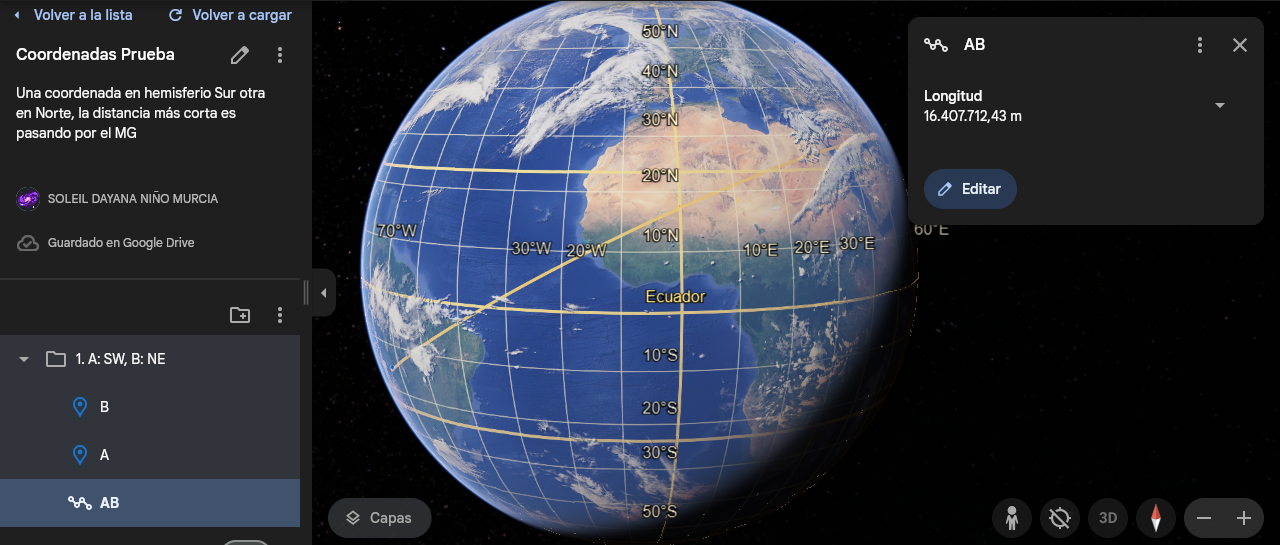


In [ ]:
#PARA USAR EL CÓDIGO CON CUALQUIER PAR DE COORDENADAS DESEADAS APLIQUE ESTO
coord_arr = []
print('A continuación, ingrese tres coordenadas. Si La coordenada es Norte u Este ingrese el valor positivo, si es Sur u Oeste ingresélo negativo')
for dic in range(4):
  grados= int(input('grados: '))
  minutos = int(input('minutos: '))
  segundos = int(input('segundos: '))
  coord_arr.append(np.radians(convert_coord(grados, minutos, segundos)))
print(coord_arr)

Lat_A = coord_arr[0]
Long_A = coord_arr[1]
Lat_B = coord_arr[2]
Long_B = coord_arr[3]
#ejemplo sugerido: 15°59'18"S 65°12'31"W, 26°31'33"N 81°37'27"E

A continuación, ingrese tres coordenadas. Si La coordenada es Norte u Este ingrese el valor positivo, si es Sur u Oeste ingresélo negativo
grados: -15
minutos: -59
segundos: -18
grados: -65
minutos: -12
segundos: -31
grados: 26
minutos: 31
segundos: 33
grados: 81
minutos: 37
segundos: 27
[-0.2790490585730267, -1.1381049645414467, 0.46296312850192917, 1.4246104575299379]


**CÁLCULOS**
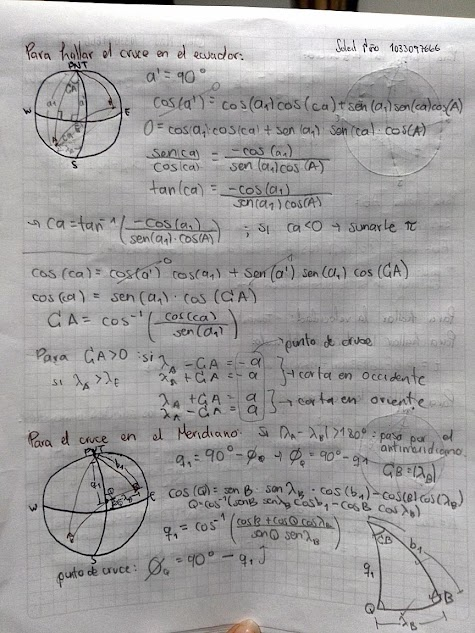

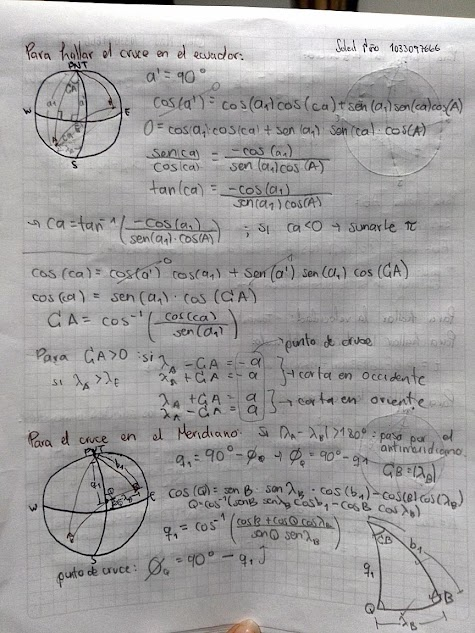